In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import config
import time_analysis as ta

plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

# Load Data

In [3]:
my_ta = ta.TimeAnalysis(config.bank_additional_train_path)


# Day of the week

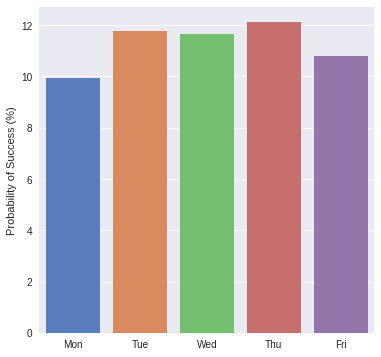

In [41]:
day_of_week_probabilities = my_ta.get_probabilities('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_day_of_week(day_of_week_probabilities['day_of_week']),
            y=day_of_week_probabilities['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)', xlabel=None)
f.savefig('data/figures/weekday-probability.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

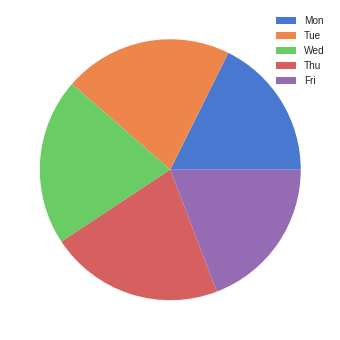

In [5]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)
day_of_week_relative_probabilities = day_of_week_probabilities
day_of_week_relative_probabilities['y'] = day_of_week_probabilities['y'] / day_of_week_probabilities['y'].sum()
ax.pie(day_of_week_relative_probabilities['y'], colors=sns.color_palette('muted'))
ax.legend(ta.number_to_day_of_week(day_of_week_probabilities['day_of_week']))

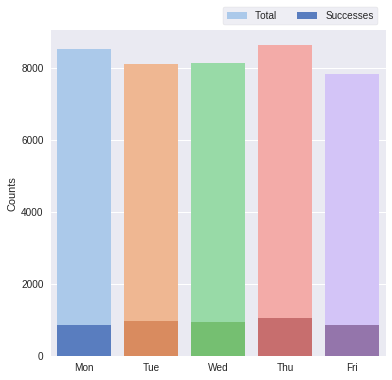

In [42]:
day_of_week_successes = my_ta.get_success_count('day_of_week')
day_of_week_count = my_ta.get_count('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_day_of_week(day_of_week_count['day_of_week']),
            y=day_of_week_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(x=ta.number_to_day_of_week(day_of_week_successes['day_of_week']),
            y=day_of_week_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, frameon=True, bbox_to_anchor=(0.5,1,0,0))
ax.set(ylabel='Counts')

f.savefig('data/figures/weekday-counts.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

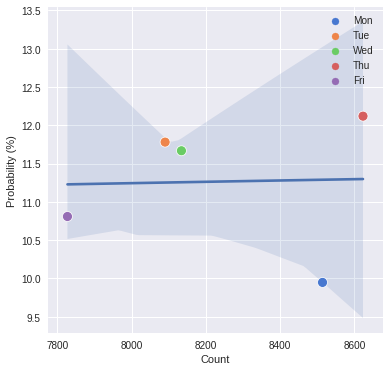

In [43]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)

sns.regplot(x=day_of_week_count['y'], 
            y=day_of_week_probabilities['y'] * 100,
            logx=True,
            scatter=False)

sns.scatterplot(x=day_of_week_count['y'], 
                y=day_of_week_probabilities['y'] * 100, 
                palette='muted',
                hue=ta.number_to_day_of_week(day_of_week_count['day_of_week']),
                s=100)

ax.set(ylabel='Probability (%)',
       xlabel='Count')

f.savefig('data/figures/weekday-scatter.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

# Month

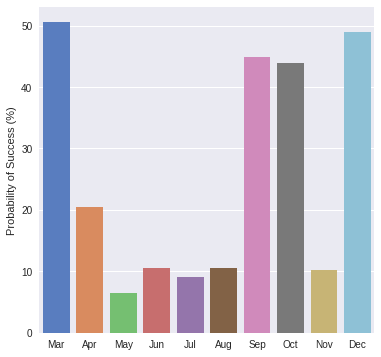

In [44]:
month_probabilities = my_ta.get_probabilities('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_probabilities['month']),
            y=month_probabilities['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)',
       xlabel=None)

f.savefig('data/figures/month-probability.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

/home/ian/miniconda3/envs/ece143_direct_marketing/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


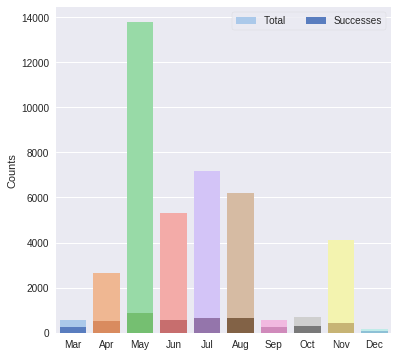

In [45]:
month_successes = my_ta.get_success_count('month')
month_count = my_ta.get_count('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_count['month']),
            y=month_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(x=ta.number_to_month(month_successes['month']),
            y=month_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(ylabel='Counts')

f.savefig('data/figures/month-counts.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

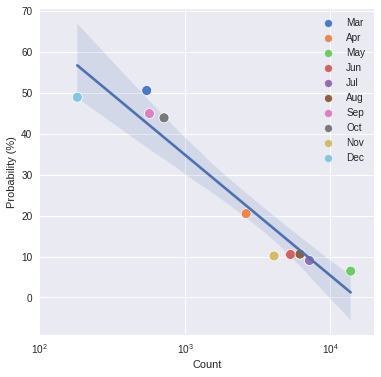

In [46]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.regplot(x=month_count['y'], 
            y=month_probabilities['y'] * 100,
            logx=True,
            scatter=False)
            
sns.scatterplot(x=month_count['y'], 
                y=month_probabilities['y'] * 100, 
                palette='muted',
                hue=ta.number_to_month(month_count['month']),
                s=100)

ax.set(ylabel='Probability (%)',
       xlabel='Count',
       xlim=[100, 20000])
ax.set_xscale('log')

f.savefig('data/figures/month-scatter.png', dpi=200, format='png', pad_inches=0, bbox_inches=0)

In [11]:
month_filter = month_count['y'] > 1000

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

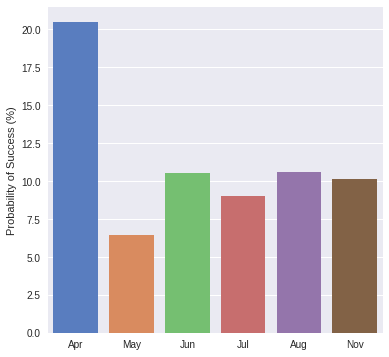

In [12]:
month_probabilities_filtered = month_probabilities[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_probabilities_filtered['month']),
            y=month_probabilities_filtered['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)',
       xlabel=None)

/home/ian/miniconda3/envs/ece143_direct_marketing/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


[Text(0, 0.5, 'Counts')]

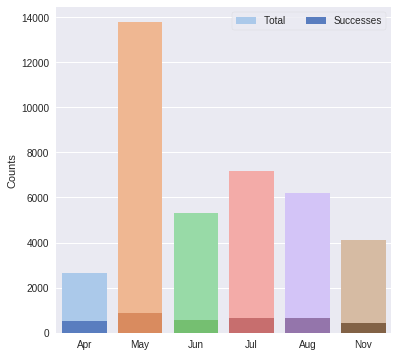

In [13]:
month_successes_filtered = month_successes[month_filter]
month_count_filtered = month_count[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_count_filtered['month']),
            y=month_count_filtered['y'],
            palette='pastel',
            label="Total")
sns.barplot(x=ta.number_to_month(month_successes_filtered['month']),
            y=month_successes_filtered['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(ylabel='Counts')